# Home assignment - Non-Neural Machine Learning (ITLB358, MIB)
---
## Task description
You will process real-life data which includes the prices of a digital currency.
- The data represents historical daily time series for a digital currency (BTC) traded on the Saudi market (SAR/Sudi Riyal).
- Prices and volumes are quoted in both SAR & USD.
- Data date range: 11.05.2018 to 30.01.2021

### Your task is as follows:
- What are the steps if the dataset were "big data"?
	- Theoretical question!
	- Please create a code in a markdown cell, which represents a basic big data pipeline (with explicative steps).
	- If you want use pseudo code.
- Download the Digital currency dataset from google drive
	- `!wget "https://drive.google.com/uc?export=download&id=1ogo2n89jpuDPVoA4HXliB15oPF54Ewav" -O "dig_curr.csv"`
- Clean the data as necessary
- Modelling:
	- Regression
		- Linear Regression (baseline)
		- Random forest regressor
		- Split data into inputs and outputs
		- Split data into train and test set
		- Input features:
			- year, open_SAR, open_USD, high_SAR, high_USD, low_SAR, low_USD, close_SAR, volume
		- Output feature(s):
			- close_USD
			- Try to predict 2 different periods (1 day / 2 days ahead) on the test set!
- Reflection
	- Critically evaluate your work, including other approaches.
	- Answer in a markdown cell.
___
# Home Assignement - Predict stock prices using regression
## Big Data - Theoretical Question
Most of the steps are the same when treating it as big data. The most striking difference is the utilization of cloud service providers such as Microsoft Azure, Amazon Web Services, Oracle Cloud and more, to provide the computational power instead of loading into memory on your own machine. 

## Step 1 - install necessary libraries
The first step is to install the necessary libraries. In case you are using a Linux distribution or Mac use:
```bash
pip3 install numpy pandas matplotlib sklearn 
```
in the case that your operating system is Windows use:
```bash
pip install numpy pandas matplotlib sklearn 
```
## Step 2 - Visualize the data

In [ ]:
!wget "https://drive.google.com/uc?export=download&id=1ogo2n89jpuDPVoA4HXliB15oPF54Ewav" -O "dig_curr.csv"

In [1]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
import yfinance as yf

In [2]:
# Generate a seed for reproductibility
random_seed = 69420
np.random.seed(random_seed)

# Read the data into a dataframe and clean it
df = pd.read_csv('dc.csv', parse_dates=["Unnamed: 0"])
# Rename the un-named column and re-index the dataset to the 'date' column
df.rename(columns= {"Unnamed: 0" : "date"}, inplace=True)
df.set_index("date", inplace=True)
# Sort the data by date
df.sort_index(ascending=True, inplace=True)
# Drop any NaN values
df.dropna(inplace=True)
df

,open_SAR,open_USD,high_SAR,high_USD,low_SAR,low_USD,close_SAR,close_USD,volume
date,,,,,,,,,
2018-05-07,36232.689408,9661.02,36340.138368,9689.67,34432.422400,9181.00,35122.496000,9365.00,33787
2018-05-08,35122.496000,9365.00,35537.665280,9475.70,33980.649216,9060.54,34457.025024,9187.56,25533
2018-05-09,34421.171200,9178.00,35216.256000,9390.00,33622.336000,8965.00,34916.224000,9310.00,25673
2018-05-10,34916.224000,9310.00,35235.458048,9395.12,33641.088000,8970.00,33761.850880,9002.20,25055
2018-05-11,33761.888384,9002.21,33816.606720,9016.80,31282.086400,8341.00,31503.360000,8400.00,48227
...,...,...,...,...,...,...,...,...,...
2021-01-26,120966.114176,32254.19,123470.218752,32921.88,115652.472448,30837.37,121767.124608,32467.77,84972
2021-01-27,121753.023104,32464.01,122102.860416,32557.29,109668.146688,29241.72,113885.208960,30366.15,95911
2021-01-28,113870.357376,30362.19,126703.438592,33783.98,111919.811840,29842.10,125131.570944,33364.86,92621


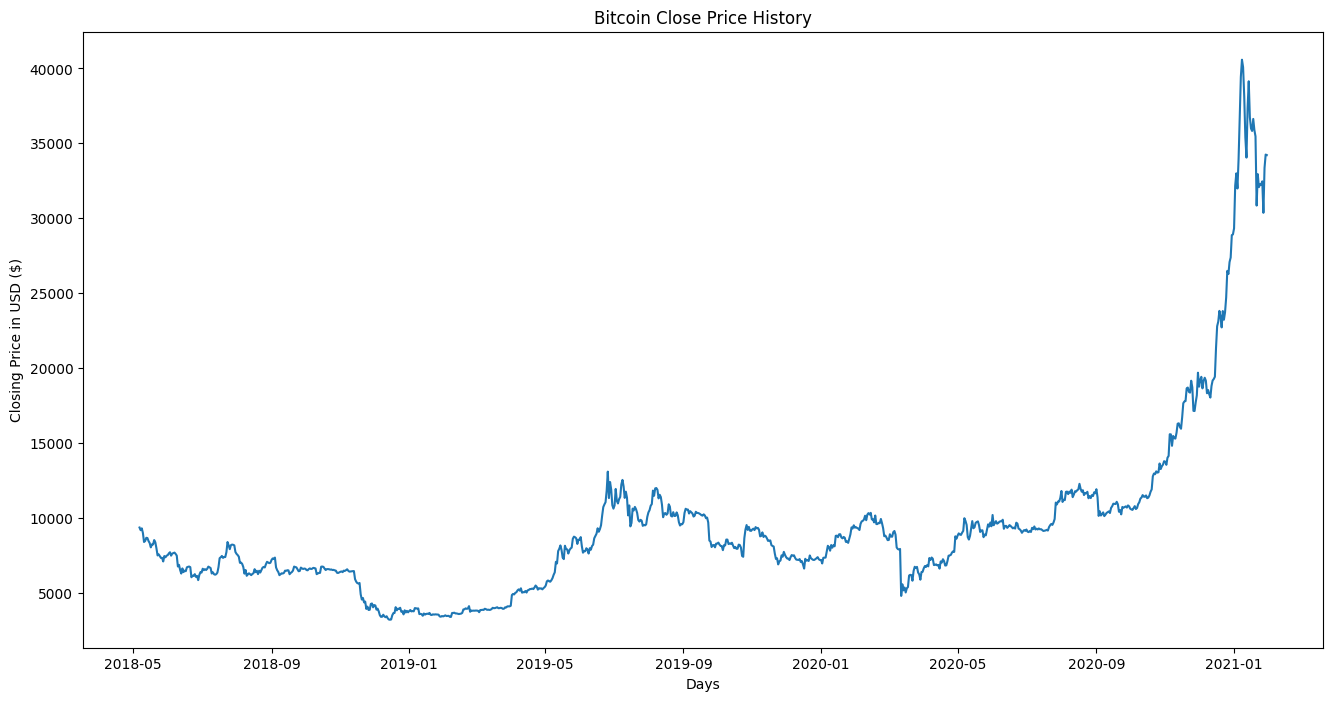

In [3]:
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Bitcoin Close Price History')
plt.xlabel('Days')
plt.ylabel('Closing Price in USD ($)')
plt.plot(df['close_USD'])
plt.show()

## Predict Stock Prices 
### Linear Regression Model

In [104]:
# Dropping columns we won't be using for the predictions of closing price
x = df.drop(['close_USD', 'close_SAR'], axis=1)

# Getting just the closing price column
y = df['close_USD']

# Test train split
X_train, X_test, y_train, y_test = train_test_split(x, y, shuffle=False, train_size=0.5, random_state=random_seed)

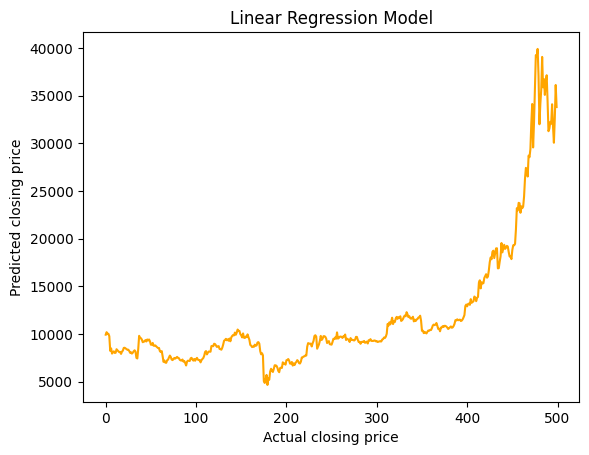

In [105]:
# Fitting the linear regression model with the training data
linear = LinearRegression().fit(X_train,y_train)

# Making predictions using the testing data
predicted_lr = linear.predict(X_test)

# Plotting the predicted values
plt.plot(predicted_lr, color='orange')
plt.ylabel('Predicted closing price')
plt.xlabel('Actual closing price')
plt.title('Linear Regression Model')
plt.show()

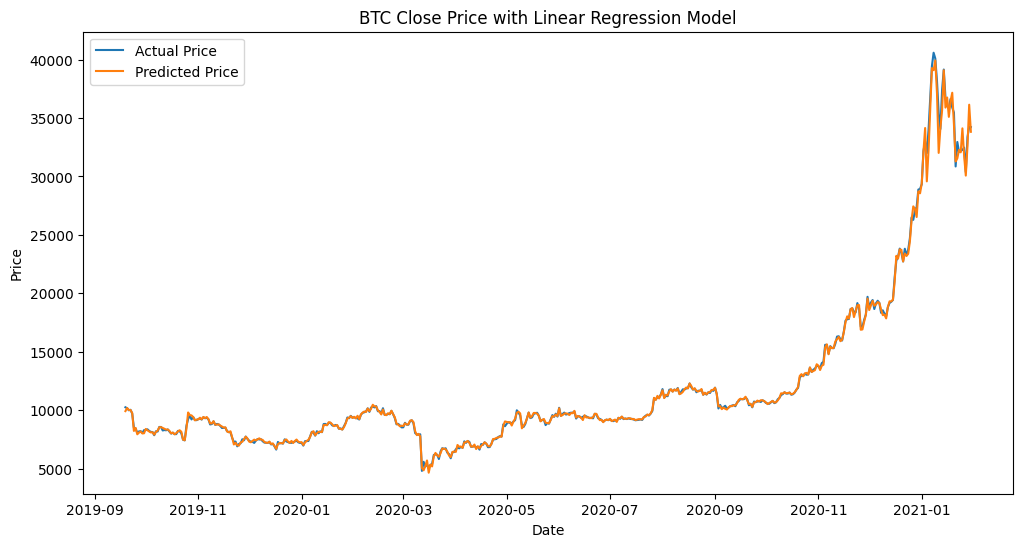

In [106]:
# Creating a dataframe to gather the predicted data
predicted_price = pd.DataFrame(predicted_lr,index=y_test.index,columns = ['lr_price'])
predicted_price['actual'] = df['close_USD']

# Plotting the predicted values against the original values
plt.figure(figsize=(12,6))
plt.plot(predicted_price['actual'])
plt.plot(predicted_price['lr_price'])
plt.legend(['Actual Price', 'Predicted Price'])
plt.title('BTC Close Price with Linear Regression Model')  
plt.ylabel("Price")
plt.xlabel('Date')
plt.show()

In [107]:
print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, predicted_lr), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, predicted_lr), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, predicted_lr)), 4))
print("(R^2) Score:", round(metrics.r2_score(y_test, predicted_lr), 4))
print(f'Train Score: {linear.score(X_train, y_train) * 100:.2f}% and Test Score: {linear.score(X_test, y_test) * 100:.2f}% using Linear Regression.')

errors = abs(predicted_lr - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.') 

Mean Absolute Error: 135.1318
Mean Squared Error: 105786.1496
Root Mean Squared Error: 325.2478
(R^2) Score: 0.9978
Train Score: 99.83% and Test Score: 99.78% using Linear Regression.
Accuracy: 99.04 %.


### Random Forest Model
It is important to have parameters that are optimized and in this case the following code is used to give parameters that can be put into the model to optimize for efficiency and time. This step is entirely optional and if you decide to use it, the parameters will have to be manually adjusted in the cell after.

**Please note that running the next cell will take approximately 1-2 minutes and will clutter up the screen as the output will exceed 200 lines.**

In [64]:
grid_rf = {
'n_estimators': [20, 50, 100, 500, 1000],  
'max_depth': np.arange(1, 15, 1),  
'min_samples_split': [2, 10, 9], 
'min_samples_leaf': np.arange(1, 15, 2, dtype=int),  
'bootstrap': [True, False], 
'random_state': [1, 2, 30, 42]
}
rscv = RandomizedSearchCV(estimator=RandomForestRegressor(), param_distributions=grid_rf, cv=3, n_jobs=-1, verbose=2, n_iter=200)
rscv_fit = rscv.fit(X_train, y_train)
best_parameters = rscv_fit.best_params_
print(best_parameters)

Fitting 3 folds for each of 200 candidates, totalling 600 fits
[CV] END bootstrap=False, max_depth=14, min_samples_leaf=1, min_samples_split=9, n_estimators=50, random_state=42; total time=   0.2s
[CV] END bootstrap=False, max_depth=14, min_samples_leaf=1, min_samples_split=9, n_estimators=50, random_state=42; total time=   0.3s
[CV] END bootstrap=False, max_depth=14, min_samples_leaf=1, min_samples_split=9, n_estimators=50, random_state=42; total time=   0.2s
[CV] END bootstrap=False, max_depth=7, min_samples_leaf=1, min_samples_split=9, n_estimators=50, random_state=2; total time=   0.2s
[CV] END bootstrap=False, max_depth=7, min_samples_leaf=1, min_samples_split=9, n_estimators=50, random_state=2; total time=   0.2s
[CV] END bootstrap=True, max_depth=8, min_samples_leaf=13, min_samples_split=10, n_estimators=20, random_state=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=8, min_samples_leaf=13, min_samples_split=10, n_estimators=20, random_state=30; total time=   0.1s
[CV

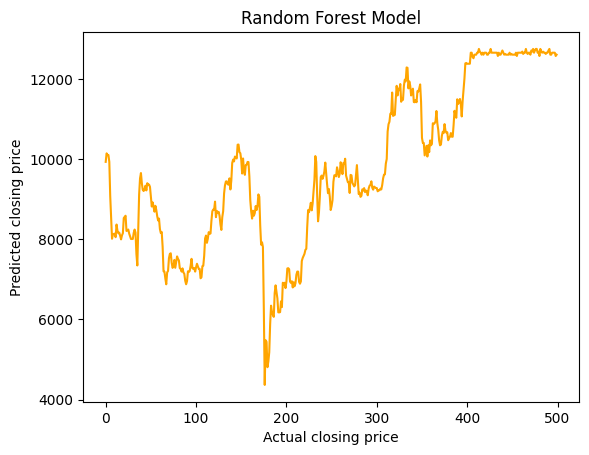

In [116]:
# Fitting the random forest model with the training dataset
forest = RandomForestRegressor(random_state=random_seed, n_estimators=20, min_samples_split=2, min_samples_leaf=1, max_depth=6, bootstrap=True)

forest.fit(X_train, y_train.values.ravel())

# Making predictions using the testing data
predicted = forest.predict(X_test)

# Plotting the predicted values
plt.plot(predicted, color='orange')
plt.ylabel('Predicted closing price')
plt.xlabel('Actual closing price')
plt.title('Random Forest Model')
plt.show()

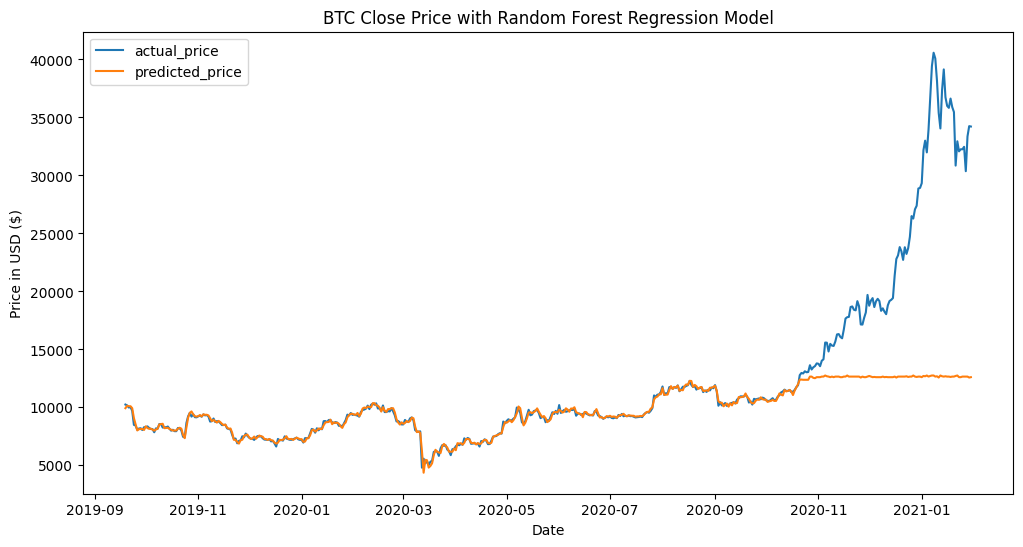

In [117]:
# Plotting the predicted values against the original values
predicted_price['forest_price'] = predicted


plt.figure(figsize=(12,6))
plt.plot(predicted_price['actual']) 
plt.plot(predicted_price['forest_price'])
plt.legend(['actual_price','predicted_price'])  
plt.title('BTC Close Price with Random Forest Regression Model')  
plt.ylabel("Price in USD ($)")
plt.xlabel('Date')
plt.show()

In [118]:
print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, predicted), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, predicted), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, predicted)), 4))
print("(R^2) Score:", round(metrics.r2_score(y_test, predicted), 4))
print(f'Train Score : {forest.score(X_train, y_train) * 100:.2f}% and Test Score : {forest.score(X_test, y_test) * 100:.2f}% using Random Tree Regressor.')

errors = abs(predicted - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.') 

Mean Absolute Error: 2260.1265
Mean Squared Error: 37105861.3884
Root Mean Squared Error: 6091.4581
(R^2) Score: 0.2435
Train Score : 99.84% and Test Score : 24.35% using Random Tree Regressor.
Accuracy: 90.96 %.


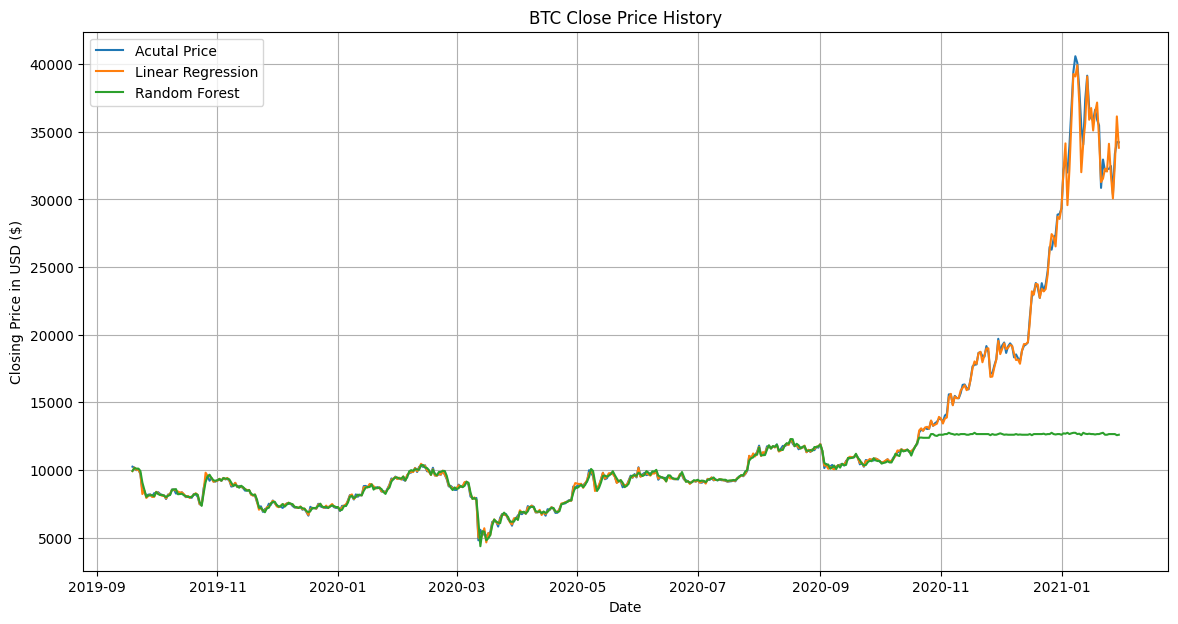

In [119]:
# Comparing the two results
plt.figure(figsize=(14,7))
plt.title('BTC Close Price History')
plt.xlabel('Date')
plt.ylabel('Closing Price in USD ($)')

plt.plot(predicted_price['actual'])
plt.plot(predicted_price['lr_price'])
plt.plot(predicted_price['forest_price'])
plt.legend(['Acutal Price', 'Linear Regression', 'Random Forest'])
plt.grid()
plt.show()

## Assesment



Need more data. Re-did the entire test with approximately 3000 rows instead of 1000 rows.

In [12]:
import yfinance as yf

btc = yf.download("BTC-USD", start="2012-01-01", end="2022-10-16")
df2 = pd.DataFrame(btc)
df2.dropna()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2022-10-11,19139.000000,19241.960938,18925.603516,19051.417969,19051.417969,28711532910
2022-10-12,19052.646484,19203.199219,19029.757812,19157.445312,19157.445312,24950173846
2022-10-13,19156.966797,19453.328125,18319.822266,19382.904297,19382.904297,44219840004


In [13]:
X = df2.drop(['Close', 'Adj Close'], axis=1)

y = df2[['Close']]

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.10)

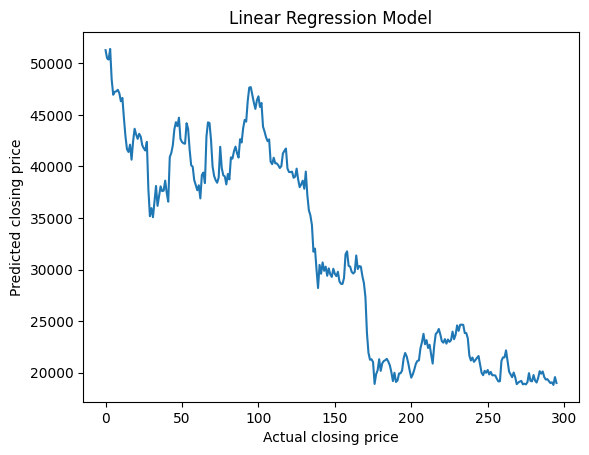

In [14]:
linear = LinearRegression().fit(X_train,y_train)

predicted_lr = linear.predict(X_test)

plt.plot(predicted_lr)
plt.ylabel('Predicted closing price')
plt.xlabel('Actual closing price')
plt.title('Linear Regression Model')
plt.show()

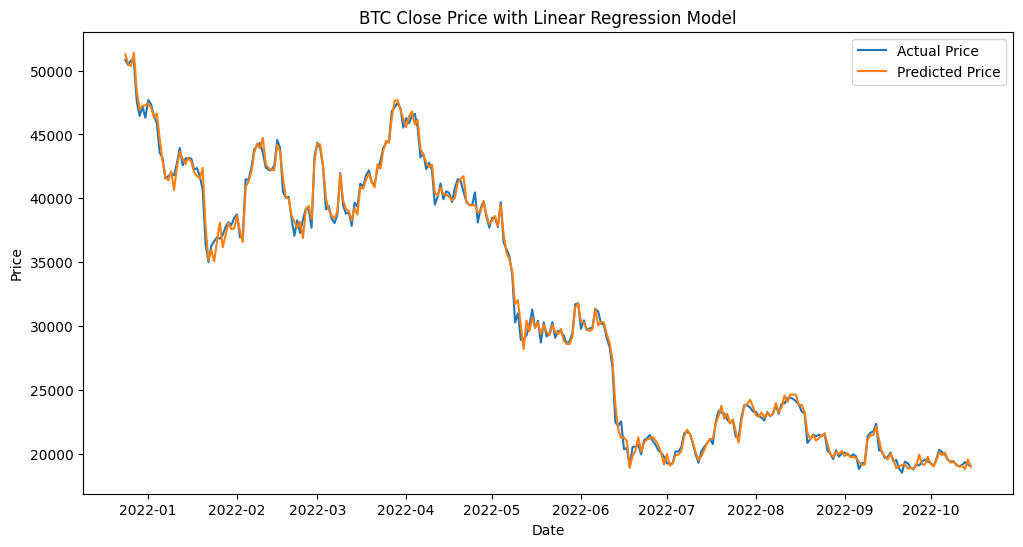

In [15]:
predicted_price = pd.DataFrame(predicted_lr,index=y_test.index,columns = ['lr_price'])
predicted_price['actual'] = df2['Close']

plt.figure(figsize=(12,6))
plt.plot(predicted_price['actual'])
plt.plot(predicted_price['lr_price'])
plt.legend(['Actual Price', 'Predicted Price'])
plt.title('BTC Close Price with Linear Regression Model')  
plt.ylabel("Price")
plt.xlabel('Date')
plt.show()

In [16]:
print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, predicted_lr), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, predicted_lr), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, predicted_lr)), 4))
print("(R^2) Score:", round(metrics.r2_score(y_test, predicted_lr), 4))
print(f'Train Score: {linear.score(X_train, y_train) * 100:.2f}% and Test Score: {linear.score(X_test, y_test) * 100:.2f}% using Linear Regression.')

# errors = abs(predicted_lr - y_test)
# mape = 100 * (errors / y_test)
# accuracy = 100 - np.mean(mape)
# print('Accuracy:', round(accuracy, 2), '%.') 

Mean Absolute Error: 359.0147
Mean Squared Error: 232515.2308
Root Mean Squared Error: 482.1983
(R^2) Score: 0.9977
Train Score: 99.96% and Test Score: 99.77% using Linear Regression.


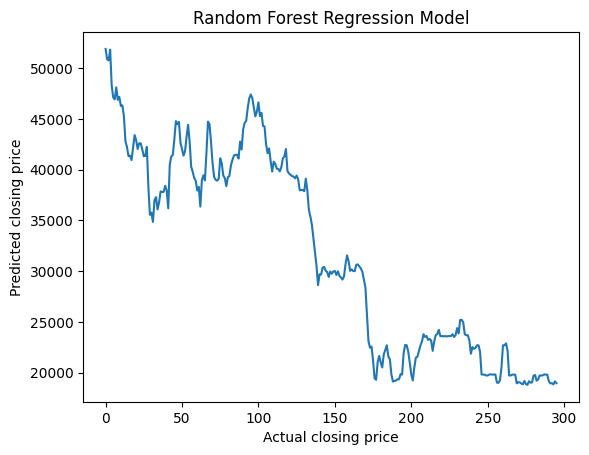

In [17]:
forest = RandomForestRegressor(random_state=1, n_estimators=42, min_samples_split=2, min_samples_leaf=1, max_depth=13, bootstrap=True)

forest.fit(X_train, y_train.values.ravel())

predicted_forest = forest.predict(X_test)

plt.plot(predicted_forest)
plt.ylabel('Predicted closing price')
plt.xlabel('Actual closing price')
plt.title('Random Forest Regression Model')
plt.show()

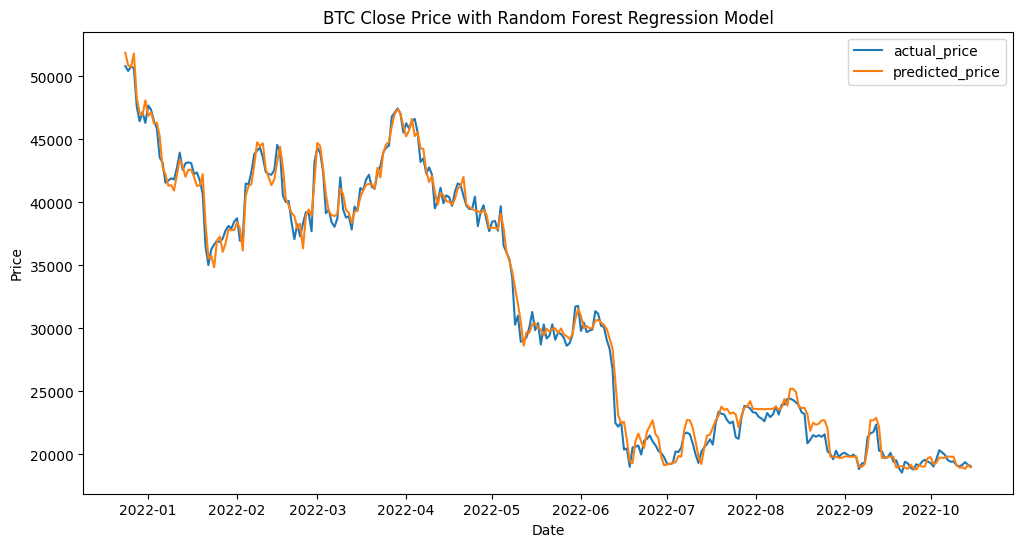

In [18]:
predicted_price['forest_price'] = predicted_forest
plt.figure(figsize=(12,6))
plt.plot(predicted_price['actual'])  
plt.plot(predicted_price['forest_price'])  

plt.legend(['actual_price','predicted_price'])  
plt.title('BTC Close Price with Random Forest Regression Model')  
plt.ylabel("Price")
plt.xlabel('Date')
plt.show()

In [19]:
print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, predicted_forest), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, predicted_forest), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, predicted_forest)), 4))
print("(R^2) Score:", round(metrics.r2_score(y_test, predicted_forest), 4))
print(f'Train Score: {linear.score(X_train, y_train) * 100:.2f}% and Test Score: {linear.score(X_test, y_test) * 100:.2f}% using Random Forest Regressor.')

Mean Absolute Error: 609.0481
Mean Squared Error: 631200.9628
Root Mean Squared Error: 794.4816
(R^2) Score: 0.9937
Train Score: 99.96% and Test Score: 99.77% using Random Forest Regressor.


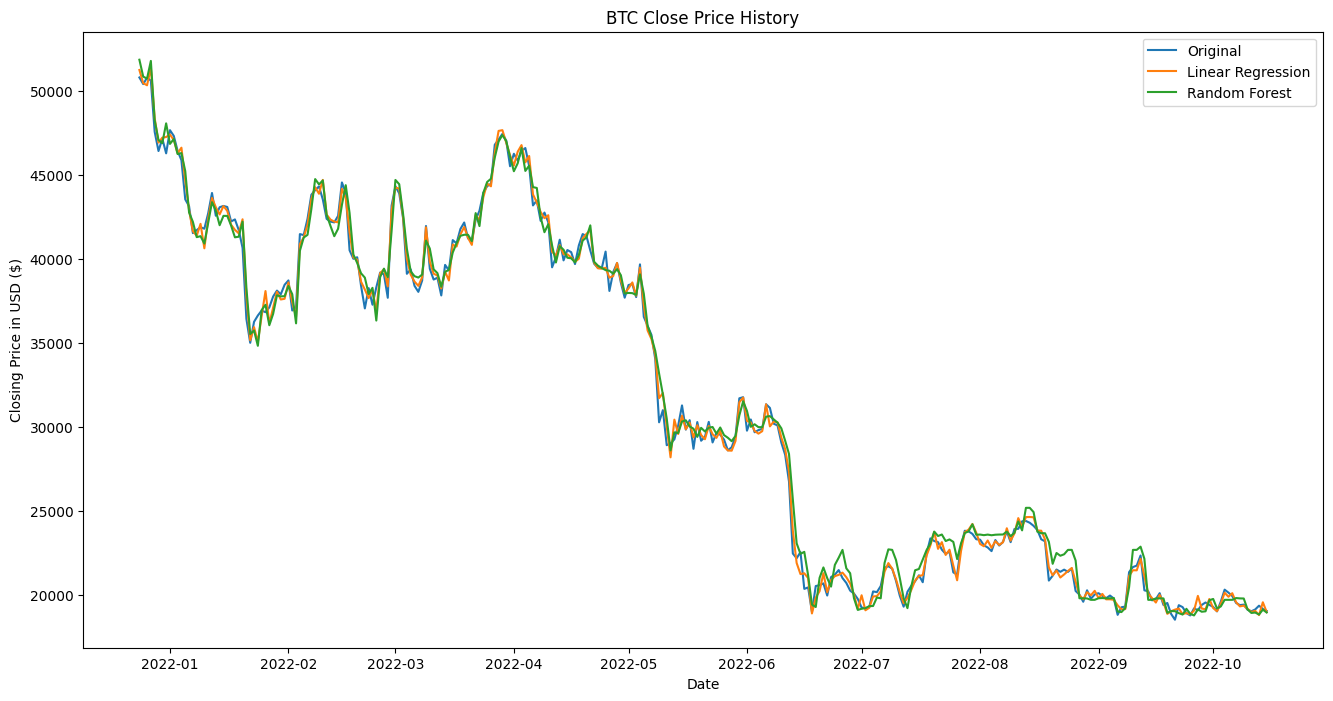

In [20]:
plt.figure(figsize=(16,8))
plt.title('BTC Close Price History')
plt.xlabel('Date')
plt.ylabel('Closing Price in USD ($)')

plt.plot(predicted_price['actual'])
plt.plot(predicted_price['lr_price'])
plt.plot(predicted_price['forest_price'])
plt.legend(['Original', 'Linear Regression', 'Random Forest'])
plt.show()

***
## Predicting 1-2 days ahead on Test data

It is quite simple to create a model to predict 1 to 2 or even more days ahead. All we really have to do is shift the dataframe back the number of desired days. I will continue to use the bigger dataset as it provides us with more accurate figures than the previous one, however we can just as easily use the previous dataset to predict the values. The only problematic is the random forest regressor as that is not suited for predicting in a time series and a more adequate way to predict is the Linear Regression model. 

In this case we will do both.

In [21]:
# Create adjustable variable to predict # days ahead
future_days = 2

In [27]:
# Create X and y variables shifted by the number of days we want to predict.
X = df2.drop(['Close', 'Adj Close'], axis=1)[:-future_days]
y = df2[['Close']][:-future_days]

# Divide the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

# Train both models
forest = RandomForestRegressor().fit(X_train, y_train)
linear = LinearRegression().fit(X_train, y_train)

X

/tmp/ipykernel_354/4098430966.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest = RandomForestRegressor().fit(X_train, y_train)


,Open,High,Low,Volume
Date,,,,
2014-09-17,465.864014,468.174011,452.421997,21056800
2014-09-18,456.859985,456.859985,413.104004,34483200
2014-09-19,424.102997,427.834991,384.532013,37919700
2014-09-20,394.673004,423.295990,389.882996,36863600
2014-09-21,408.084991,412.425995,393.181000,26580100
...,...,...,...,...
2022-10-09,19417.478516,19542.539062,19349.259766,16837262532
2022-10-10,19446.416016,19515.466797,19102.978516,27425022774
2022-10-11,19139.000000,19241.960938,18925.603516,28711532910


In [31]:
# Now we just need to provide the models with new datasets and see how it will predict the future values.
to_predict = df2.drop(['Close', 'Adj Close'], axis=1)['2022-10-14':]

forest_pred = forest.predict(to_predict)
lr_pred = linear.predict(to_predict)

future_prices = df2[X.shape[0]:]
future_prices['Prediction_Forest'] = forest_pred
future_prices['Prediction_Linear'] = lr_pred

/tmp/ipykernel_354/3009303151.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  future_prices['Prediction_Forest'] = forest_pred
/tmp/ipykernel_354/3009303151.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  future_prices['Prediction_Linear'] = lr_pred


In [32]:
future_prices[['Close', 'Prediction_Forest', 'Prediction_Linear']]

,Close,Prediction_Forest,Prediction_Linear
Date,,,
2022-10-14,19185.656250,19151.940430,19577.406202
2022-10-15,19067.634766,18977.159512,19008.882759


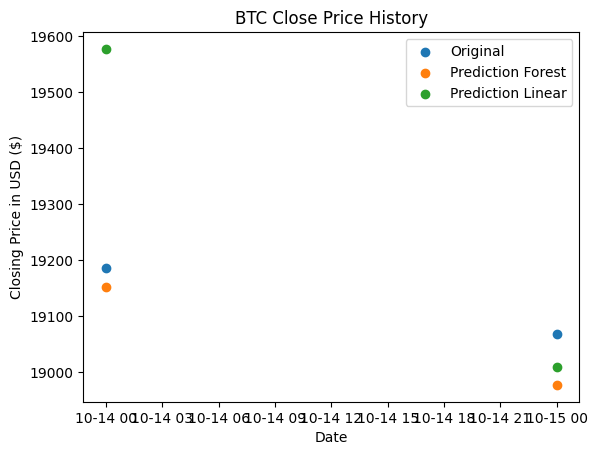

In [33]:
plt.title('BTC Close Price History')
plt.xlabel('Date')
plt.ylabel('Closing Price in USD ($)')
plt.scatter(future_prices.index, future_prices['Close'])
plt.scatter(future_prices.index, future_prices['Prediction_Forest'])
plt.scatter(future_prices.index, future_prices['Prediction_Linear'])
plt.legend(['Original', 'Prediction Forest', 'Prediction Linear'])
plt.show()